In [ ]:
## Some quick visualisations on harmonised BESf2f so I don't totally jam up on technical issues

In [3]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}


Toggle code

In [4]:
global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



In [19]:
f2f_harmonised["housing"].value_counts()

OWN     32903
RENT    18684
Name: housing, dtype: int64

In [ ]:
sns.lmplot(data="f2f_harmonised")

In [7]:
f2f_harmonised["bloc_complete"].value_counts()

Left-Lib      24460
Right-Auth    17675
Neither        9997
Name: bloc_complete, dtype: int64

In [ ]:
# f2f_harmonised["bloc_complete"] == "Right-Auth"

In [9]:
temp = pd.get_dummies(f2f_harmonised["bloc_complete"])
f2f_harmonised[temp.columns] = temp

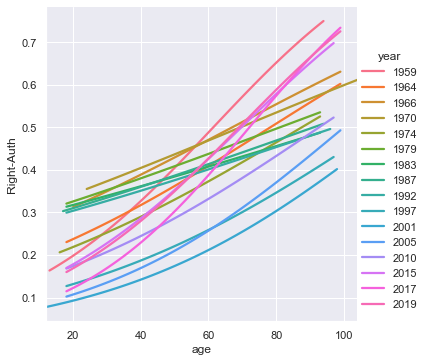

In [21]:
# sns.lmplot(data=f2f_harmonised,col = "year")
g = sns.lmplot(x="age", y="Right-Auth", hue="year", data=f2f_harmonised,logistic=True,
               ci=None,scatter=False,fit_reg=True)

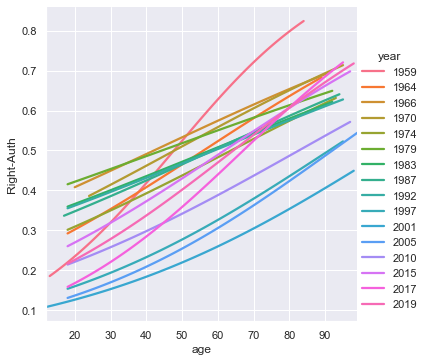

In [20]:
# sns.lmplot(data=f2f_harmonised,col = "year")
g = sns.lmplot(x="age", y="Right-Auth", hue="year", data=f2f_harmonised[f2f_harmonised["housing"]=="OWN"],
               logistic=True,
               ci=None,scatter=False,fit_reg=True)

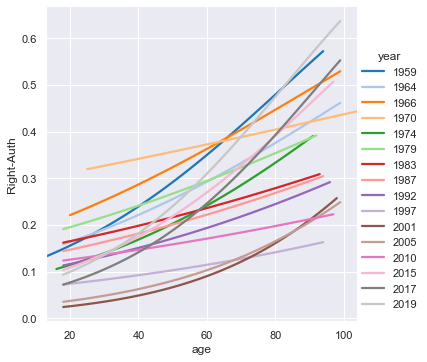

In [37]:
# sns.lmplot(data=f2f_harmonised,col = "year")
g = sns.lmplot(x="age", y="Right-Auth", hue="year",data=f2f_harmonised[f2f_harmonised["housing"]=="RENT"],
               logistic=True,
               ci=None,scatter=False,fit_reg=True,palette='tab20',
#                markers=list(Line2D.markers.keys())[0:len(f2f_harmonised["year"].unique())]
              )

In [32]:
from matplotlib.lines import Line2D
list(Line2D.markers.keys())


['.',
 ',',
 'o',
 'v',
 '^',
 '<',
 '>',
 '1',
 '2',
 '3',
 '4',
 '8',
 's',
 'p',
 '*',
 'h']

In [54]:
df = f2f_harmonised[f2f_harmonised["dataset"]=="1964"].drop(["dataset","uid","year","harmonised_voted",
                                                             "vote_complete","vote_complete_simple",
                                                             "bloc_complete","turnout_complete","bloc",
                                                             "gender","housing","vote_simple","vote","inc"],axis=1)

In [59]:
df = pd.get_dummies(df)
# df.isnull().sum()


MSE: 0.20, MAE: 0.41, EV: 0.12, R2: 0.12


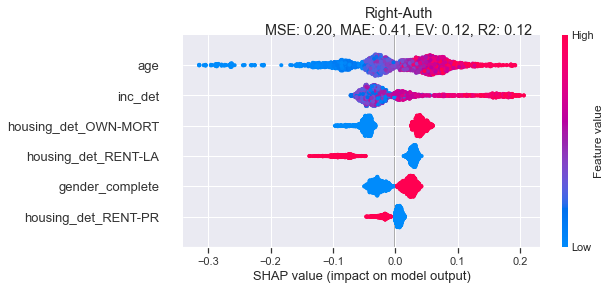

<Figure size 1152x720 with 0 Axes>

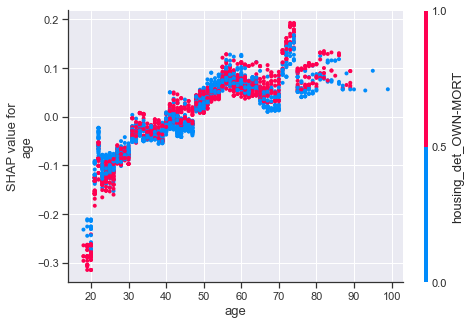

<Figure size 1152x720 with 0 Axes>

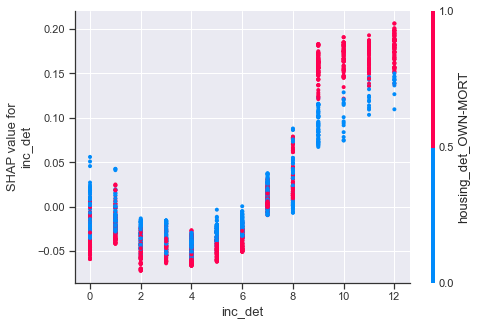

<Figure size 1152x720 with 0 Axes>

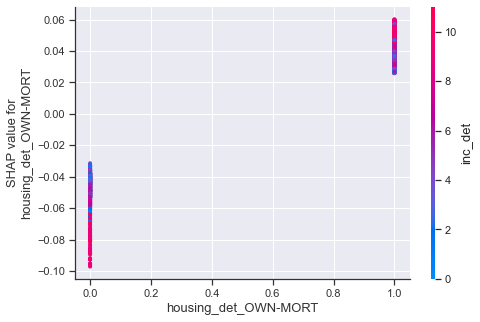

<Figure size 1152x720 with 0 Axes>

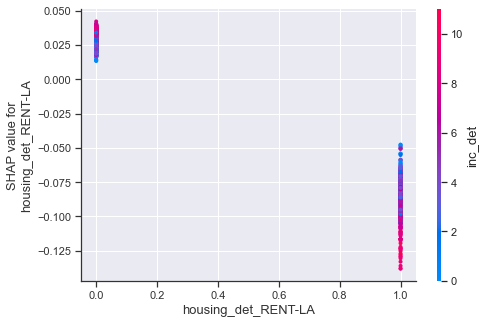

<Figure size 1152x720 with 0 Axes>

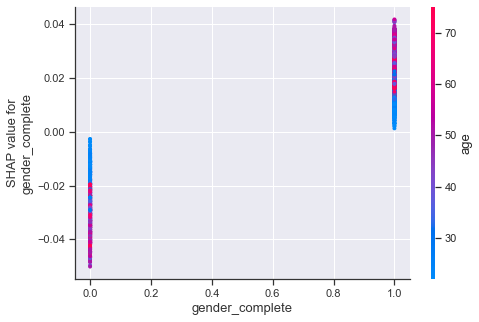

<Figure size 1152x720 with 0 Axes>

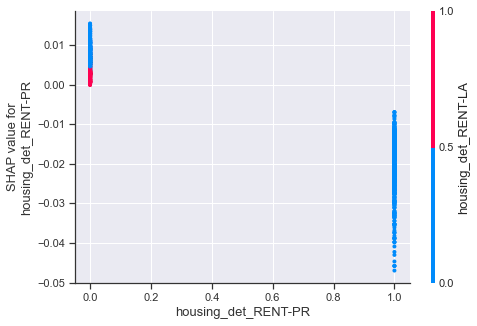

In [64]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Right-Auth"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df[var_stub].notnull()
wt_cols = []
min_features = 10
colname = "Right-Auth"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Right-Auth"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df.drop(["Left-Lib","Neither","wt","birth_year"],axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [71]:
import statsmodels.api as sm


jk_list = ['age', 'inc_det', 'gender_complete', 
       'housing_det_OWN-MORT', 'housing_det_RENT-LA', 'housing_det_RENT-PR']
# dataset = merged[merged["Country"].isin(["England","Wales"])]

Y = df['Right-Auth']/100
X = df[jk_list]
X = sm.add_constant(X)
model = sm.Logit(Y,X)
results = model.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.003664
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Right-Auth   No. Observations:                 2922
Model:                          Logit   Df Residuals:                     2915
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                     inf
Time:                        14:43:17   Log-Likelihood:                -10.707
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.9847      2.175     -3.211      0.001     -11.248      -2.722
age                      0.0173      0.020      0.878      0.380      -0.021       0.056
inc_det                  0.0727      0.106      0.688      0.492      -0.135       0.280
gender_complete          0.2066      0.645      0.320      0.749      -1.057       1.470
housing_det_OWN-MORT     0.1806      1.775      0.102      0.919      -3.298       3.659
housing_det_RENT-LA     -0.5125      1.911     -0.268      0.789      -4.257       3.232
housing_det_RENT-PR     -0.1201      1.866     -0.064      0.949      -3.777       3.536
========================================================================================
"""